In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [3]:
from sklearn.datasets import load_diabetes

In [4]:
dia=load_diabetes()

In [5]:
x=dia.data
y=dia.target

In [6]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42,test_size=0.3)


In [7]:
from sklearn.preprocessing import StandardScaler

In [8]:
sc=StandardScaler()

In [9]:
x_train1=sc.fit_transform(x_train)
x_test1=sc.transform(x_test)

In [10]:
from sklearn.model_selection import GridSearchCV

In [20]:
from sklearn.svm import SVC,SVR

In [12]:
svc=SVC()

In [13]:
par={'C':[0.001,0.01,0.1,1,10,100,1000],
    'kernel':['linear','rbf'],
    'degree':[1,2,3,4],
    'gamma':[0.001,0.01,0.1,1,10,100,1000]}

In [14]:
clf = GridSearchCV(svc, par, cv=5,return_train_score=True,refit=True)

In [15]:
clf.fit(x_train1,y_train)

C:\Users\prana\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='auto_deprecated', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='warn', n_jobs=None,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
                         'degree': [1, 2, 3, 4],
                         'gamma': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
                         'kernel': ['linear', 'rbf']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring=None, verbose=0)

In [16]:
clf.best_params_

{'C': 1, 'degree': 1, 'gamma': 0.001, 'kernel': 'linear'}

In [17]:
clf.best_score_

0.019417475728155338

In [39]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,r2_score

In [19]:
y_pred=clf.predict(x_train1)
print(accuracy_score(y_train,y_pred))
y_pred1=clf.predict(x_test1)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(classification_report(y_test,y_pred1))

0.8381877022653722
0.007518796992481203
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
              precision    recall  f1-score   support

        31.0       0.00      0.00      0.00         0
        37.0       0.00      0.00      0.00         1
        39.0       0.00      0.00      0.00         0
        42.0       0.00      0.00      0.00         1
        44.0       0.00      0.00      0.00         0
        47.0       0.00      0.00      0.00         0
        48.0       0.00      0.00      0.00         2
        49.0       0.00      0.00      0.00         0
        51.0       0.00      0.00      0.00         0
        52.0       0.00      0.00      0.00         3
        53.0       0.00      0.00      0.00         1
        55.0       0.00      0.00      0.00         0
        58.0       0.00      0.00      0.00         0
        59.0       0.00      0.00      0.00         1
        60.0       0.00      

In [22]:
svr=SVR()

In [23]:
clf1 = GridSearchCV(svr, par, cv=5,return_train_score=True,refit=True)

In [24]:
clf1.fit(x_train1,y_train)

C:\Users\prana\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3,
                           epsilon=0.1, gamma='auto_deprecated', kernel='rbf',
                           max_iter=-1, shrinking=True, tol=0.001,
                           verbose=False),
             iid='warn', n_jobs=None,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
                         'degree': [1, 2, 3, 4],
                         'gamma': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
                         'kernel': ['linear', 'rbf']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring=None, verbose=0)

In [28]:
clf1.best_params_

{'C': 100, 'degree': 1, 'gamma': 0.01, 'kernel': 'rbf'}

In [29]:
clf1.best_score_

0.4541513089419289

In [41]:
y_pred3=clf1.predict(x_test1)
print(r2_score(y_test,y_pred3))


0.4769957475301767


In [42]:
from sklearn.linear_model import LinearRegression

In [43]:
lm = LinearRegression() #lm is the object of the class

In [44]:
lm.fit(x_train1,y_train) #fit the training data to the model

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [45]:
y_ptest=lm.predict(x_test1)
r2_score(y_test,y_ptest)

0.47729201741573335

In [47]:
y_ptrain=lm.predict(x_train1)
r2_score(y_train,y_ptrain)

0.524413200822697

In [55]:
from sklearn.neighbors import KNeighborsRegressor
knn=KNeighborsRegressor(n_neighbors=7)

In [56]:
knn.fit(x_train1,y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=7, p=2,
                    weights='uniform')

In [57]:
y_ktrain=knn.predict(x_train1)
print(r2_score(y_train,y_ktrain))
y_ktest=knn.predict(x_test1)
print(r2_score(y_test,y_ktest))

0.5400652503538192
0.41462739405336224


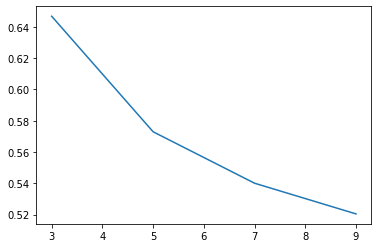

In [54]:
kvalue=[]
score_test=[]
score_train=[]
for i in range(3,10,2):
    knn=KNeighborsRegressor(n_neighbors=i)
    knn.fit(x_train1,y_train)
    y_pred=knn.predict(x_train1)
    a=r2_score(y_train,y_pred)
    y_pred1=knn.predict(x_test1)
    b=r2_score(y_test,y_pred1)
    kvalue.append(i)
    score_train.append(a)
    score_test.append(b)

plt.plot(kvalue,score_train)



In [58]:
dia1=pd.DataFrame(dia.data,columns=dia.feature_names)

In [59]:
dia1.skew()

age   -0.231382
sex    0.127385
bmi    0.598148
bp     0.290664
s1     0.378108
s2     0.436592
s3     0.799255
s4     0.735374
s5     0.291774
s6     0.207917
dtype: float64